# Logistic Regression for Banknote Authentication 
<hr>
### Overview

- [Choosing a classification algorithm](#Choosing-a-classification-algorithm)
- [First steps with scikit-learn](#First-steps-with-scikit-learn)
- [Loading the Dataset](#Dataset)
    
- [Logistic regression](#Logistic-regression:)
    - [Training a logistic regression model with scikit-learn](#Training-a-logistic-regression-model-with-scikit-learn)
    - [Measuring our classifier using Binary classification performance metrics](#Measuring-our-classifier-using-Binary-classification-performance-metrics)
        - [Confusion Matrix](#Confusion-Matrix)
        - [Precision and Recall](#Precision-and-Recall:)        
        - [Calculating the F1 measure](#Calculating-the-F1-measure)
        - [ROC-AUC](#ROC-AUC)
    - [Finding the most Important Features](#Finding-the-most-important-features-with-forests-of-trees)
    - [Plotting our model decison regions](#Plotting-our-model-decison-regions)
    - [Tackling overfitting via regularization](#Tackling-overfitting-via-regularization)
- [Summary](#Summary)

## Choosing a classification algorithm

In the subsequent chapters, we will take a tour through a selection of popular and powerful machine learning algorithms that are commonly used in academia as well as in the industry. While learning about the differences between several supervised learning algorithms for classification, we will also develop an intuitive appreciation of their individual strengths and weaknesses by tackling real-word classification problems. We will take our first steps with the scikit-learn library, which offers a user-friendly interface for using those algorithms efficiently and productively. 

Choosing an appropriate classification algorithm for a particular problem task requires practice: each algorithm has its own quirks and is based on certain assumptions. The "No Free Lunch" theorem: no single classifier works best across all possible scenarios. In practice, it is always recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem; these may differ in the number of features or samples, the amount of noise in a dataset, and whether the classes are linearly separable or not.

Eventually, the performance of a classifier, computational power as well as predictive power, depends heavily on the underlying data that are available for learning. The five main steps that are involved in training a machine learning algorithm can be summarized as follows:

1. Selection of features.
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm.
4. Evaluating the performance of the model.
5. Tuning the algorithm.

Since the approach of this section is to build machine learning knowledge step by step, we will mainly focus on the principal concepts of the different algorithms in this chapter and revisit topics such as feature selection and preprocessing, performance metrics, and hyperparameter tuning for more detailed discussions later in the section.

## First steps with scikit-learn

In this example we are going to use Logistic Regression algorithm to classify banknotes as authentic or not. Since we have two outputs (Authentic or Not Authentic) this type of classification is called Binary Classification. Classification task consisting cases where we have to classify into one or more classes is called Multi-Class Classifation. 

### Dataset

You can get the Banknote Authentication dataset from here: http://archive.ics.uci.edu/ml/datasets/banknote+authentication. [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html) is one of the most widely used resource for datasets. As you'll see, we use multiple datasets from this repository to tackle different Machine Learning tasks. 

The Banknote Authentication data was extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images. The dataset contains the following attributes:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer 0 for fake and 1 for authentic bank notes) 

Save the downloaded `data_banknote_authentication.txt` in the same directory as of your code.

In [1]:
import numpy as np
import pandas as pd

# read .csv from provided dataset
csv_filename="data_banknote_authentication.txt"

# We assign the collumn names ourselves and load the data in a Pandas Dataframe
df=pd.read_csv(csv_filename,names=["Variance","Skewness","Curtosis","Entropy","Class"])

We'll take a look at our data:

In [2]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Apparently, the first 5 instances of our datasets are all fake (Class is 0).

In [3]:
print("No of Fake bank notes = " + str(len(df[df['Class'] == 0])))

No of Fake bank notes = 762


In [4]:
print("No of Authentic bank notes = " + str(len(df[df['Class'] == 1])))

No of Authentic bank notes = 610


This shows we have 762 total instances of Fake banknotes and 610 total instances of Authentic banknotes in our dataset.

In [5]:
features=list(df.columns[:-1])
print("Our features :"  )
features

Our features :


['Variance', 'Skewness', 'Curtosis', 'Entropy']

In [6]:
X = df[features]
y = df['Class']

In [7]:
print('Class labels:', np.unique(y))

Class labels: [0 1]


To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets. Splitting data into 70% training and 30% test data:

In [11]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Many machine learning and optimization algorithms also require feature scaling
for optimal performance. Here, we will standardize the features using the StandardScaler class from scikit-learn's preprocessing module:

Standardizing the features:

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the StandardScaler class from the preprocessing module and initialized a new StandardScaler object that we assigned to the variable sc. Using the fit method, StandardScaler estimated the parameters μ (sample mean) and  (standard deviation) for each feature dimension from the training data. By calling the transform method, we then standardized the training data using those estimated parameters μ and . Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.

## Logistic regression:

Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry. The logistic regression model is a linear model for binary classification that can be extended to multiclass classification via the OvR technique.

#### The sigmoid function used in the Logistic Regression:

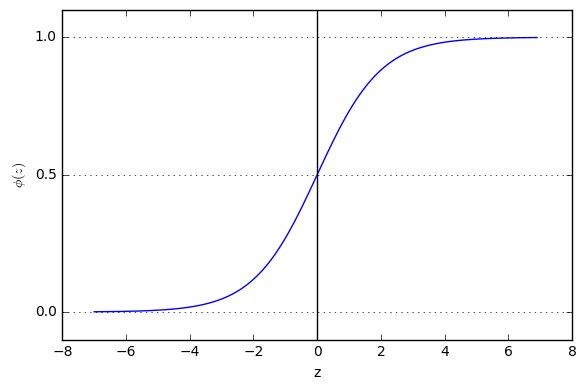

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

#### Learning the weights of the logistic cost function

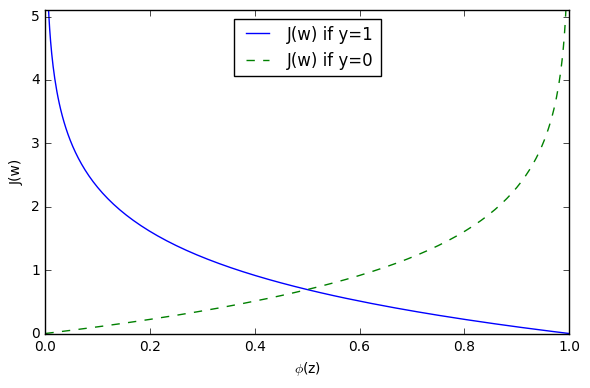

In [14]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

### Training a logistic regression model with scikit-learn

Scikit-learn implements a highly optimized version of logistic regression that also supports multiclass settings off-the-shelf, we will skip the implementation and use the `sklearn.linear_model.LogisticRegression` class as well as the familiar fit method to train the model on the standardized flower training dataset:

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_test.shape

(412,)

Having trained a model in scikit-learn, we can make predictions via the predict method

In [19]:
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 5


On executing the preceding code, we see that the perceptron misclassifies 5 out of the 412 note samples. Thus, the misclassification error on the test dataset is 0.012 or 1.2 percent (5/412 = 0.012).

## Measuring our classifier using Binary classification performance metrics
A variety of metrics exist to evaluate the performance of binary classifiers against
trusted labels. The most common metrics are accuracy, precision, recall, F1 measure,
and ROC AUC score. All of these measures depend on the concepts of true positives,
true negatives, false positives, and false negatives. Positive and negative refer to the
classes. True and false denote whether the predicted class is the same as the true class.

For our Banknote classifier, a true positive prediction is when the classifier correctly
predicts that a note is authentic. A true negative prediction is when the classifier
correctly predicts that a note is fake. A prediction that a fake note is authentic
is a false positive prediction, and an authentic note is incorrectly classified as fake is a
false negative prediction. 

### Confusion Matrix

A confusion matrix, or contingency table, can be used to
visualize true and false positives and negatives. The rows of the matrix are the true
classes of the instances, and the columns are the predicted classes of the instances:

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

[[227   5]
 [  0 180]]


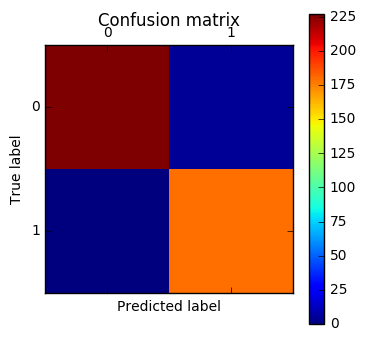

In [21]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix indicates that there were 227 true negative predictions, 180
true positive predictions, 0 false negative predictions, and 5 false positive
prediction.

Scikit-learn also implements a large variety of different performance metrics that are available via the metrics module. For example, we can calculate the classification accuracy of the perceptron on the test set as follows:

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.99


Here, y_test are the true class labels and y_pred are the class labels that we predicted previously.


Furthermore, we can predict the class-membership probability of the samples via
the predict_proba method. For example, we can predict the probabilities of the
first banknote sample:

In [23]:
lr.predict_proba(X_test_std[0,:])

array([[  3.97356229e-06,   9.99996026e-01]])

The preceding array tells us that the model predicts a chance of 99.96 percent that the sample is an autentic banknote (y = 1) class, and 0.003 percent chance that the sample is a fake note (y = 0).


While accuracy measures the overall correctness of the classifier, it does not distinguish between false positive errors and false negative errors. Some applications may be more sensitive to false negatives than false positives, or vice
versa. Furthermore, accuracy is not an informative metric if the proportions of the classes are skewed in the population. For example, a classifier that predicts whether or not credit card transactions are fraudulent may be more sensitive to
false negatives than to false positives.

A classifier that always predicts that transactions are legitimate could have a high accuracy score, but would not be useful. For these reasons, classifiers are often evaluated using two additional measures called precision and recall.

## Precision and Recall:

**Precision is the fraction of positive predictions that are correct.** For instance, in our Banknote Authentication
classifier, precision is the fraction of notes classified as authentic that are actually
authentic. 

Precision is given by the following ratio:
####                                                     P = TP / (TP + FP) 

Sometimes called sensitivity in medical domains, recall is the fraction of the truly
positive instances that the classifier recognizes. A recall score of one indicates
that the classifier did not make any false negative predictions. For our Banknote Authentication
classifier, **recall is the fraction of authentic notes that were truly classified as authentic.**

Recall is calculated with the following ratio:
#### R = TP / (TP + FN)

Individually, precision and recall are seldom informative; they are both incomplete
views of a classifier's performance. Both precision and recall can fail to distinguish
classifiers that perform well from certain types of classifiers that perform poorly. A
trivial classifier could easily achieve a perfect recall score by predicting positive for
every instance. For example, assume that a test set contains ten positive examples
and ten negative examples. 

A classifier that predicts positive for every example will
achieve a recall of one, as follows:
#### R = 10 / (10 + 0) = 1

A classifier that predicts negative for every example, or that makes only false positive
and true negative predictions, will achieve a recall score of zero. Similarly, a classifier
that predicts that only a single instance is positive and happens to be correct will
achieve perfect precision.

Scikit-learn provides a function to calculate the precision and recall for a classifier
from a set of predictions and the corresponding set of trusted labels. 

#### Calculating our Banknote Authentication classifier's precision and recall:

In [26]:
from sklearn.cross_validation import cross_val_score

precisions = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='precision')
print('Precision', np.mean(precisions), precisions)

recalls = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Precision 0.988712972421 [ 0.96629213  1.          0.97727273  1.          1.        ]
Recalls 0.988372093023 [ 1.          0.95348837  1.          1.          0.98837209]


Our classifier's precision is 0.988; almost all of the notes that it predicted as
authentic were actually authentic. Its recall is also high, indicating that it correctly classified
approximately 98 percent of the authentic messages as authentic.

### Calculating the F1 measure

The F1 measure is the harmonic mean, or weighted average, of the precision and
recall scores. Also called the f-measure or the f-score, the F1 score is calculated using
the following formula:

#### F1 = 2PR / (P + R)

The F1 measure penalizes classifiers with imbalanced precision and recall scores,
like the trivial classifier that always predicts the positive class. A model with perfect
precision and recall scores will achieve an F1 score of one. A model with a perfect
precision score and a recall score of zero will achieve an F1 score of zero. As for
precision and recall, scikit-learn provides a function to calculate the F1 score for
a set of predictions. Let's compute our classifier's F1 score.

In [27]:
f1s = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

F1 0.988341082592 [ 0.98285714  0.97619048  0.98850575  1.          0.99415205]


The arithmetic mean of our classifier's precision and recall scores is 0.98. As the
difference between the classifier's precision and recall is small, the F1 measure's
penalty is small. Models are sometimes evaluated using the F0.5 and F2 scores,
which favor precision over recall and recall over precision, respectively.

### ROC AUC
A Receiver Operating Characteristic, or ROC curve, visualizes a classifier's performance. Unlike accuracy, the ROC curve is insensitive to data sets with unbalanced class proportions; unlike precision and recall, the ROC curve illustrates the classifier's performance for all values of the discrimination threshold. ROC curves plot the classifier's recall against its fall-out. Fall-out, or the false positive rate, is the number of false positives divided by the total number of negatives. It is
calculated using the following formula:

#### F = FP / (TN + FP)


In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test,lr.predict(X_test_std))

0.98922413793103448

#### Plotting the ROC curve for our SMS spam classifier:

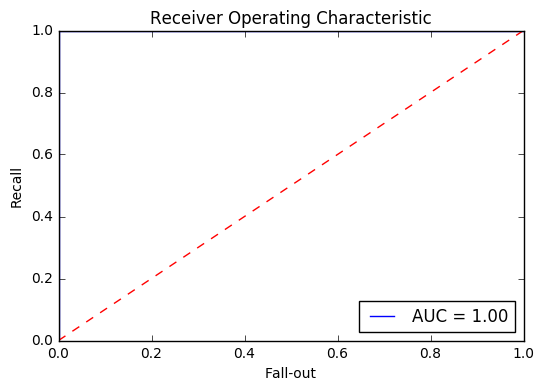

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred = lr.predict_proba(X_test_std)

false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

From the ROC AUC plot, it is apparent that our classifier outperforms random
guessing and does a very good job in classifying; almost all of the plot area lies under its curve.


### Finding the most important features with forests of trees
This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 0 - Variance (0.502450) 
2. feature 1 - Skewness (0.280639) 
3. feature 2 - Curtosis (0.153946) 
4. feature 3 - Entropy (0.062965) 


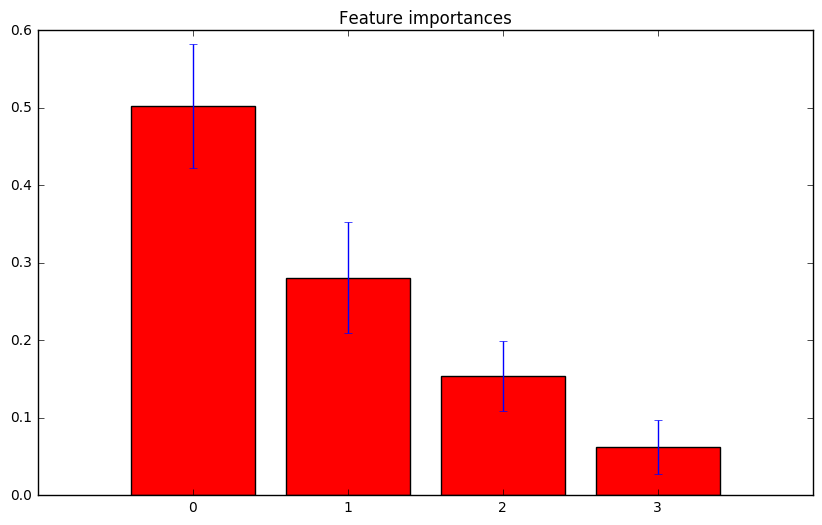

In [72]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

We'll cover the details of the code later. For now it can be evidently seen that our most important features that are helping us to correctly classify are: Variance and Skewness.
We'll use these two features to plot our graph.    
    

### Plotting our model decison regions
Finally, we can plot the decision regions of our newly trained perceptron model and visualize how well it separates the different samples.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
         X[['Variance','Skewness']], y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [74]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

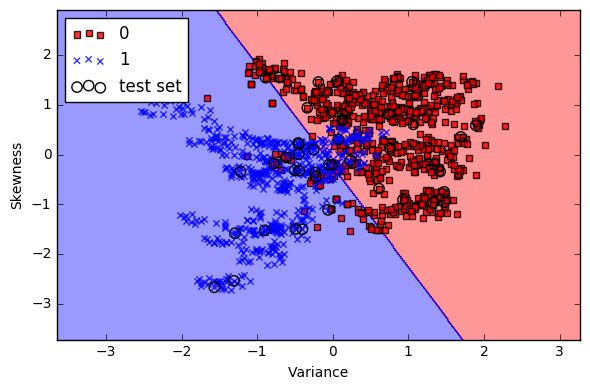

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

As we can see in the resulting plot, the banknote classes have been seperated by a abstract line generated by the Logistic Regression Classifier. We could plot this 2D plot using the features Skewness and Variance.


### Tackling overfitting via regularization

Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters that lead to a model that is too complex given the underlying data. Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance
on unseen data.

The problem of overfitting and underfitting can be best illustrated by using a more complex, nonlinear decision boundary as shown in the following figure:

<img src="images/overfitting.png">

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is a very useful method to handle collinearity (high correlation among features), filter out noise from data, and eventually prevent overfitting. The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights. The most common form of regularization is the so-called L2 regularization (sometimes also called L2 shrinkage or weight decay). 

The parameter C that is implemented for the LogisticRegression class in
scikit-learn comes from a convention in support vector machines, which will be
the topic of the next section. C is directly related to the regularization parameter, which is its inverse.

Consequently, decreasing the value of the inverse regularization parameter C means that we are increasing the regularization strength.
_____
## Summary
In this chapter, we learned that Logistic regression is not only a useful model for online learning via stochastic gradient descent, but also allows us to predict the probability of a particular event. Feel free to try out different datasets to better understand the cases where Logistic Regression works best.
<hr>